In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.ToTensor()
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(data_loader)
images, labels = dataiter.__next__()
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [6]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        # N, 1, 28, 28
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), # N, 16, 14, 14
            nn.ReLU(), 
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7), # N, 64, 7, 1, 1
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7), # N, 32, 7, 7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 14, 14
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # N, 1, 28, 28
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Note: [-1, 1] -> nn.Tanh
# nn.MaxPool2d -> nn.MaxUnpool2d

In [5]:
class AutoEncoder_Linear(nn.Module):
    def __init__(self):
        super().__init__()
        # N, 28, 28
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), # N, 28x28 -> N, 128
            nn.ReLU(), 
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3), # -> N, 3
            )

        self.decoder = nn.Sequential(
            nn.Linear(3, 12), 
            nn.ReLU(), 
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28), 
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Note: [-1, 1] -> nn.Tanh

In [7]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [29]:
num_epochs = 1
outputs: list[tuple[int, any, any]] = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        # img = img.reshape(-1, 28*28)
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")
    outputs.append((epoch, img, recon))

Epoch: 1, Loss: 0.0091
Epoch: 2, Loss: 0.0057
Epoch: 3, Loss: 0.0037
Epoch: 4, Loss: 0.0033
Epoch: 5, Loss: 0.0030
Epoch: 6, Loss: 0.0033
Epoch: 7, Loss: 0.0033
Epoch: 8, Loss: 0.0029
Epoch: 9, Loss: 0.0028
Epoch: 10, Loss: 0.0027
Epoch: 11, Loss: 0.0028
Epoch: 12, Loss: 0.0028
Epoch: 13, Loss: 0.0029
Epoch: 14, Loss: 0.0027
Epoch: 15, Loss: 0.0030
Epoch: 16, Loss: 0.0027
Epoch: 17, Loss: 0.0029
Epoch: 18, Loss: 0.0025
Epoch: 19, Loss: 0.0025
Epoch: 20, Loss: 0.0025


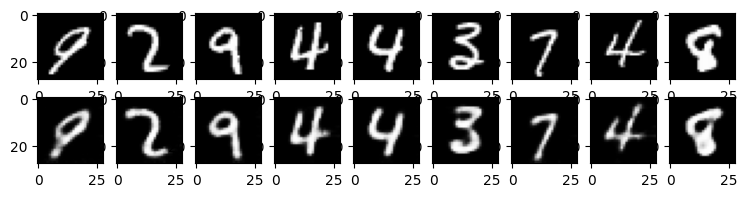

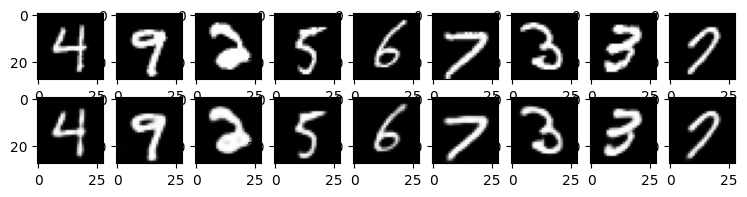

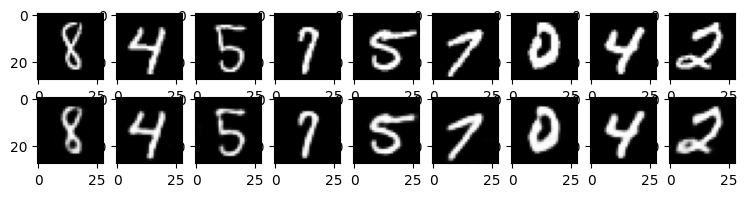

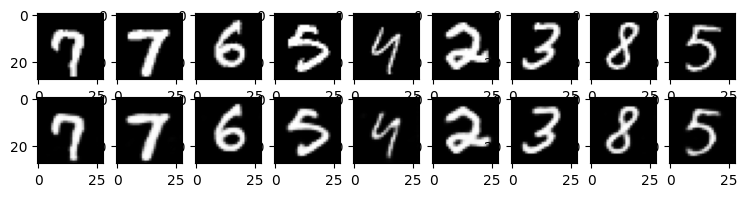

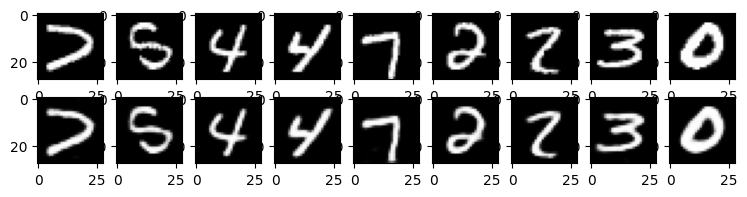

In [30]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    _, img, recon = outputs[k]
    imgs  = img.detach().numpy()
    recon = recon.detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        # item = item.reshape(-1, 28,28)
        plt.imshow(item[0])
    
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        # item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])